Import Modules


In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm 
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPool2D


loading dataset

In [2]:

TRAIN_DIR='C:/Users/bisht/OneDrive/Desktop/fer2013/train'
TEST_DIR='C:/Users/bisht/OneDrive/Desktop/fer2013/test'

function for converting folder into csv


In [3]:
def load_dataset(directory):
    image_paths=[]
    labels=[]

    for label in os.listdir(directory):
        for filename in os.listdir(os.path.join(directory,label)): #path.join adds / between path
            image_path=os.path.join(directory,label,filename)
            image_paths.append(image_path)
            labels.append(label)

        print(label,"completed")

    return image_paths,labels

initialize train DataFrame


In [4]:
train=pd.DataFrame()
train['image'],train['label']=load_dataset(TRAIN_DIR)

#shuffle dataset
train=train.sample(frac=1).reset_index(drop=True)
train.head()

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


,image,label
0,C:/Users/bisht/OneDrive/Desktop/fer2013/train\...,happy
1,C:/Users/bisht/OneDrive/Desktop/fer2013/train\...,neutral
2,C:/Users/bisht/OneDrive/Desktop/fer2013/train\...,happy
3,C:/Users/bisht/OneDrive/Desktop/fer2013/train\...,sad
4,C:/Users/bisht/OneDrive/Desktop/fer2013/train\...,happy


Initializing Test Dataframe

In [5]:
test=pd.DataFrame()
test['image'],test['label']=load_dataset(TEST_DIR)
test.head()

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


,image,label
0,C:/Users/bisht/OneDrive/Desktop/fer2013/test\a...,angry
1,C:/Users/bisht/OneDrive/Desktop/fer2013/test\a...,angry
2,C:/Users/bisht/OneDrive/Desktop/fer2013/test\a...,angry
3,C:/Users/bisht/OneDrive/Desktop/fer2013/test\a...,angry
4,C:/Users/bisht/OneDrive/Desktop/fer2013/test\a...,angry


Exploratory Data Analysis

<AxesSubplot: xlabel='label', ylabel='count'>

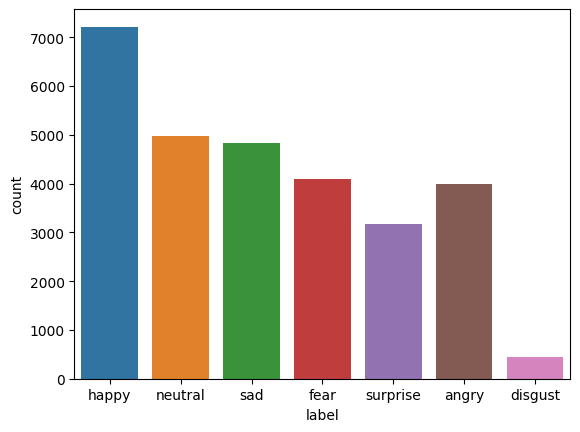

In [6]:
sns.countplot(x=train['label'])

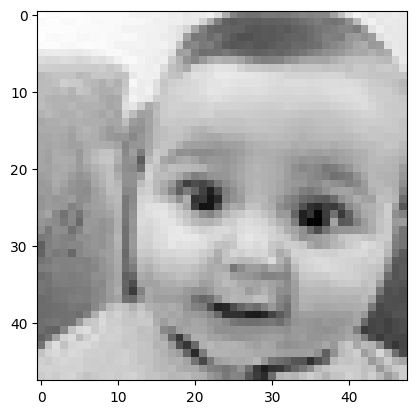

In [7]:
from PIL import Image
img=Image.open(train['image'][0])
plt.imshow(img,cmap='gray')

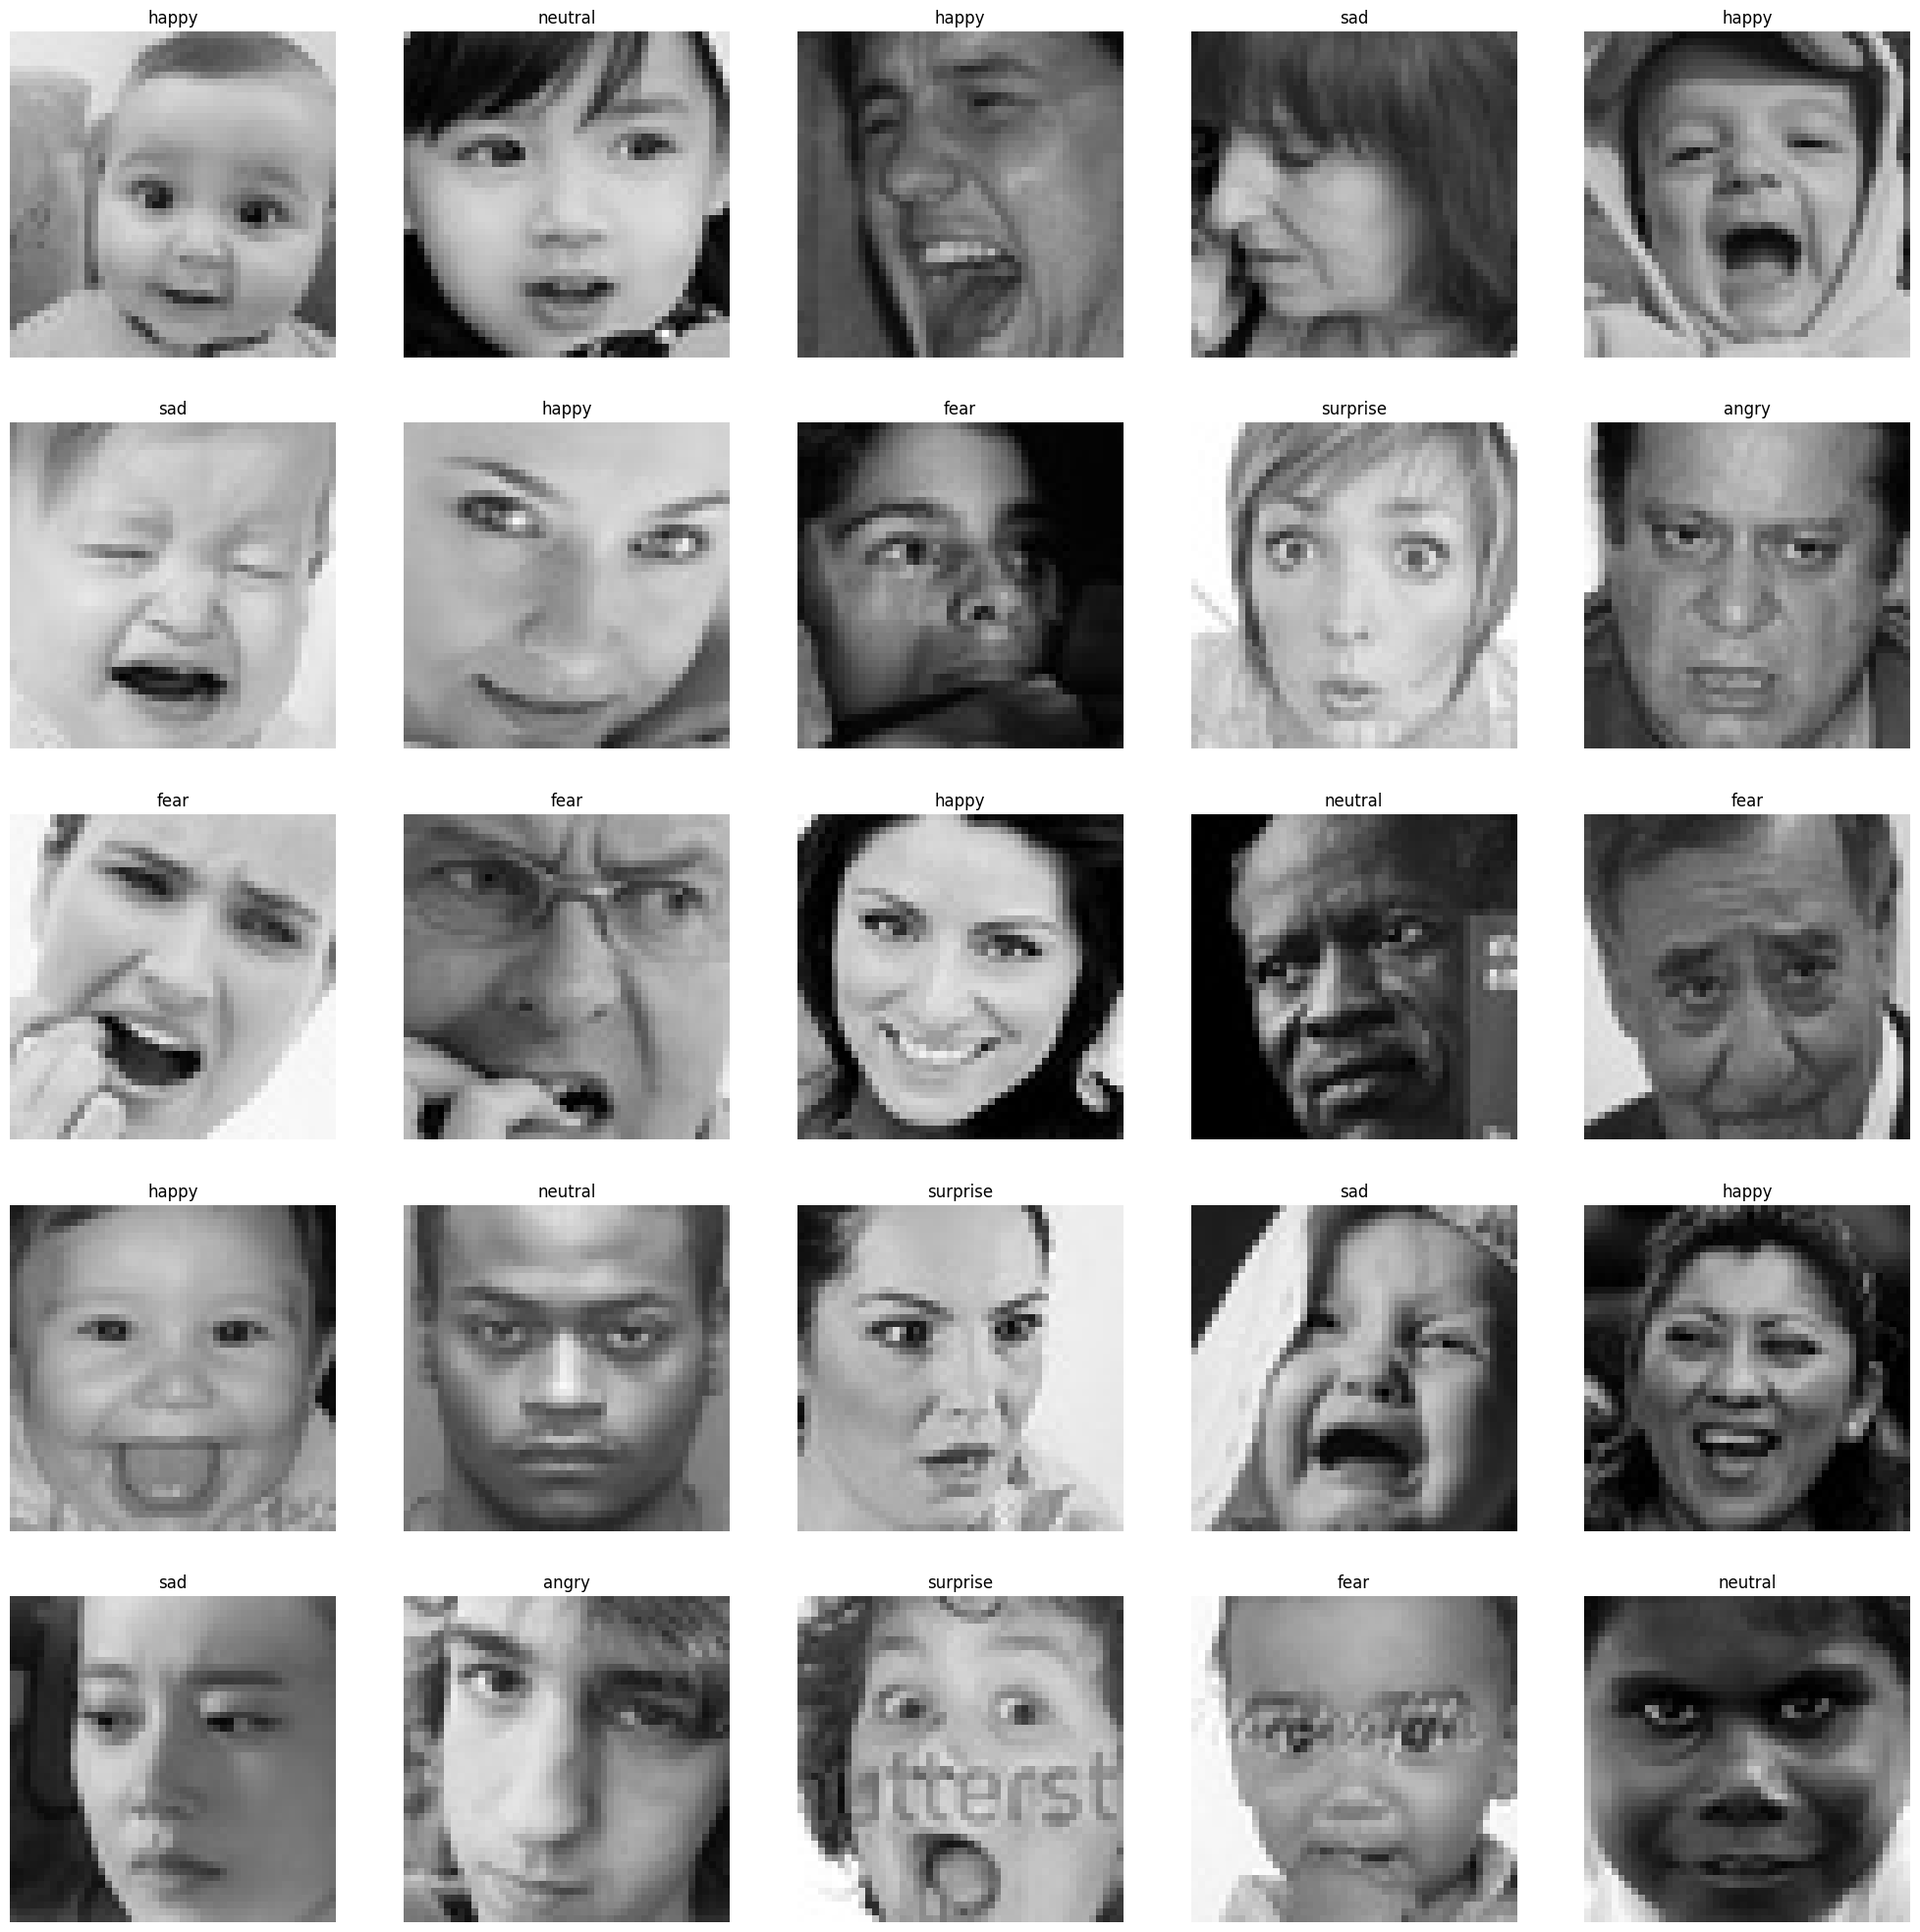

In [8]:
#to display grid of images
plt.figure(figsize=(25,25))
files=train.iloc[:25]

for index,file,label in files.itertuples():
    plt.subplot(5,5,index+1)
    img=load_img(file)
    img=np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

Feature Extraction

In [9]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img=load_img(image,grayscale=True)
        img=np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),48,48,1)
    ''' reshaping in different shape to feed in model:
    48,48 being dimension of image
    & 1= layers of color.. 1 in grayscale and 3 in rgb
    '''
    return features



In [10]:
train_features=extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [11]:
test_features=extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [12]:
#normalize the image
x_train=train_features/255.0
x_test=test_features/255.0
#to normalize data b/w 0 & 1 for better calculation in NN

In [18]:
#convert label to integer
#label encoding is used

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['label'])
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [19]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

Configuration

In [20]:
input_shape=(48,48,1)
output_class=7

Model Creation

In [25]:
model=Sequential()
#convolutional layer
model.add(Conv2D(128,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

#fully connected layers
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(output_class,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

Training Model

In [27]:
history=model.fit(x=x_train,y=y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
225/225 [==============================] - 413s 2s/step - loss: 1.5988 - accuracy: 0.3633 - val_loss: 1.4300 - val_accuracy: 0.4537
Epoch 2/10
225/225 [==============================] - 391s 2s/step - loss: 1.3555 - accuracy: 0.4730 - val_loss: 1.2994 - val_accuracy: 0.5024
Epoch 3/10
225/225 [==============================] - 411s 2s/step - loss: 1.2243 - accuracy: 0.5299 - val_loss: 1.2438 - val_accuracy: 0.5199
Epoch 4/10
225/225 [==============================] - 381s 2s/step - loss: 1.1291 - accuracy: 0.5731 - val_loss: 1.2108 - val_accuracy: 0.5336
Epoch 5/10
225/225 [==============================] - 383s 2s/step - loss: 1.0496 - accuracy: 0.6024 - val_loss: 1.1452 - val_accuracy: 0.5659
Epoch 6/10
225/225 [==============================] - 381s 2s/step - loss: 0.9737 - accuracy: 0.6342 - val_loss: 1.1570 - val_accuracy: 0.5694
Epoch 7/10
225/225 [==============================] - 382s 2s/step - loss: 0.8895 - accuracy: 0.6678 - val_loss: 1.1885 - val_accuracy: 0.5698

Plot Results

In [2]:
new_model=tf.keras.models.load_model('zz.h5')

NameError: name 'tensorflow' is not defined

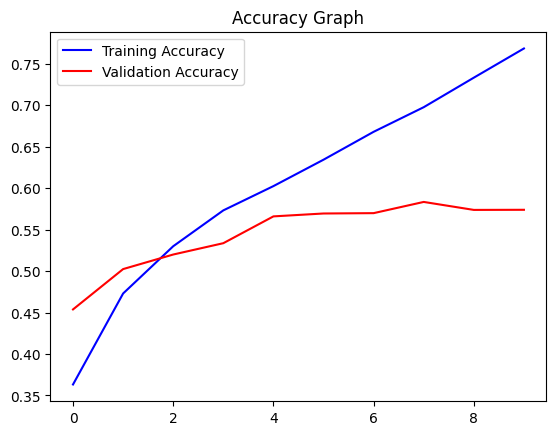

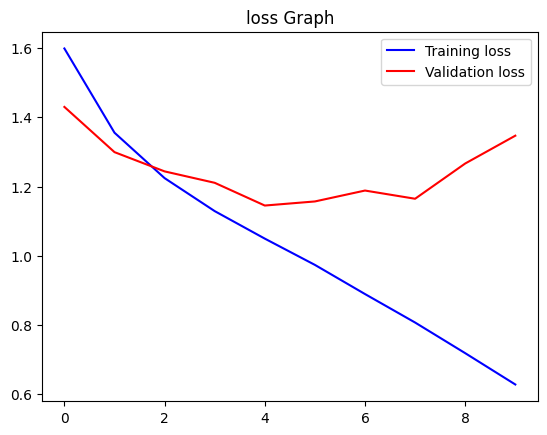

In [34]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

#accuracy Graph
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

#loss Graph
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('loss Graph')
plt.legend()

plt.show()

Test with Image Data

Original Output: angry
1/1 [==============================] - 0s 50ms/step
Predicted Output: angry


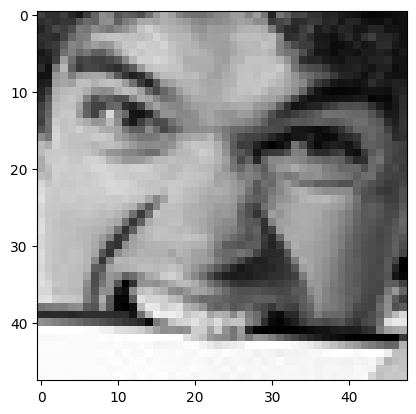

In [52]:
image_index= random.randint(0,len(test))
print("Original Output:",test['label'][image_index]) 
pred=model.predict(x_test[image_index].reshape(1,48,48,1))
prediction_label=le.inverse_transform([pred.argmax()])[0]
#pre.argmax returns the class with higher probability
print("Predicted Output:",prediction_label)
plt.imshow(x_test[image_index].reshape(48,48),cmap='gray')

Original Output: happy
1/1 [==============================] - 0s 23ms/step
Predicted Output: happy


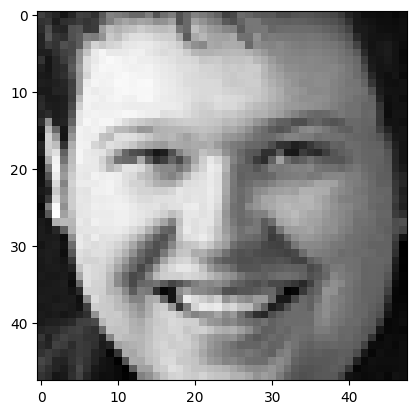

In [51]:
image_index= random.randint(0,len(test))
print("Original Output:",test['label'][image_index]) 
pred=model.predict(x_test[image_index].reshape(1,48,48,1))
prediction_label=le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:",prediction_label)
plt.imshow(x_test[image_index].reshape(48,48),cmap='gray')

Original Output: angry
1/1 [==============================] - 0s 46ms/step
Predicted Output: disgust


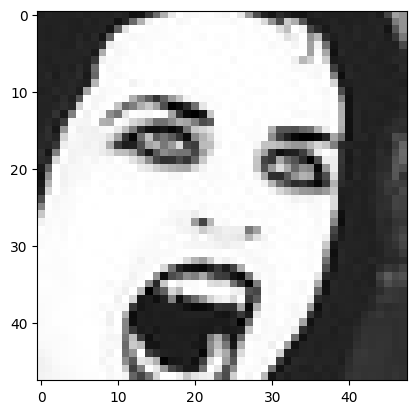

In [57]:
image_index= random.randint(0,len(test))
print("Original Output:",test['label'][image_index]) 
pred=model.predict(x_test[image_index].reshape(1,48,48,1))
prediction_label=le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:",prediction_label)
plt.imshow(x_test[image_index].reshape(48,48),cmap='gray')